In [71]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
WordCloud(colormap='Pastel1')
from matplotlib.ticker import ScalarFormatter

In [72]:
shop = 'shop.xlsx'
shop = pd.read_excel(shop)

In [73]:
shop

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


In [5]:
# 데이터 분석에 필요없는 초도상품, 제작문구 내역 컬럼 삭제
shop.drop(['초도상품', '제작문구 내역'], axis = 1, inplace = True)

# 전체 데이터 최대 매출 상품 집계하기

In [6]:
product_rank = shop.groupby('상품명')['판매금액'].sum().sort_values(ascending=False)
print(product_rank)

상품명
[스마트 HBE] 학습 전용 태블릿-일반결제                          965844000
[신세계] 신세계 상품권-4만원권                                896793600
[지사전용] 스마트 HBE-학습 전용 태블릿-후불                       622908000
[스마트 HBE] 학습 전용 태블릿-정기결제                          561132000
[스마트 HBE] 학습 전용 태블릿(정기결제)                         466488000
                                                    ...    
[3M] 파인룩스 스탠드/LED 7200 (색상선택)                             0
[동원] 명절 식품 선물세트 + 동원 판호                                   0
[학생선물] 히어로 레이저 요요                                         0
[생활용품] 스위스 몽크로스  Smart Multi 티메이커 EGK-MST22000            0
[학습교구] 1인용 자석 숫자                                          0
Name: 판매금액, Length: 13252, dtype: int64


In [7]:
# 엑셀 파일로 저장하기 위해서 데이터 프레임 변환
product_rank_df = product_rank.reset_index()
product_rank_df.columns = ['상품명', '판매 금액']

In [8]:
# 결측치 파악하기
product_rank_df.isnull().sum()

상품명      0
판매 금액    0
dtype: int64

In [9]:
# 특수문자, 공백 제거
product_rank_df['상품명'] = product_rank_df['상품명'].str.replace(r'[^\w]', '', regex=True)

# 문자열 변환
product_rank_df['상품명'] = product_rank_df['상품명'].astype(str)

#테스트, Test 들어가는 상품 제거하기
delete = ~product_rank_df['상품명'].str.contains('테스트|test', case=False, regex=True, na=False)
product = product_rank_df[delete]

In [10]:
product['상품명'] = product['상품명'].str.replace(r'.*태블릿.*', '태블릿', regex=True)

product['상품명'] = product['상품명'].str.replace(r'.*신세계 상품권.*', '신세계 상품권', regex=True)
product['상품명'] = product['상품명'].str.replace(r'.*신세계상품권.*', '신세계 상품권', regex=True)

product['상품명'] = product['상품명'].str.replace(r'.*GS25.*', '편의점', regex=True)
product['상품명'] = product['상품명'].str.replace(r'.*세븐일레븐.*', '편의점', regex=True)
product['상품명'] = product['상품명'].str.replace(r'.*CU.*', '편의점', regex=True)

product['상품명'] = product['상품명'].str.replace(r'.*마스크.*', '마스크 용품', regex=True)

product['상품명'] = product['상품명'].str.replace(r'.*A4.*', '복사용지', regex=True)

product['상품명'] = product['상품명'].str.replace(r'.*배스킨라빈스.*', '커피/빵/아이스크림', regex=True)
product['상품명'] = product['상품명'].str.replace(r'.*투썸.*', '커피/빵/아이스크림', regex=True) # 투썸플레이스라고 안 하고 투썸이라 한 이유는 품목 중 '투썸크렘슈' 가 있습니다.
product['상품명'] = product['상품명'].str.replace(r'.*스타벅스.*', '커피/빵/아이스크림', regex=True) # 스타벅스의 경우 혼자서 1억 4천만원을 차지합니다.
product['상품명'] = product['상품명'].str.replace(r'.*이디야.*', '커피/빵/아이스크림', regex=True)
product['상품명'] = product['상품명'].str.replace(r'.*할리스.*', '커피/빵/아이스크림', regex=True)
product['상품명'] = product['상품명'].str.replace(r'.*커피빈.*', '커피/빵/아이스크림', regex=True)
product['상품명'] = product['상품명'].str.replace(r'.*엔제리너스.*', '커피/빵/아이스크림', regex=True)
product['상품명'] = product['상품명'].str.replace(r'.*파스쿠찌.*', '커피/빵/아이스크림', regex=True)
product['상품명'] = product['상품명'].str.replace(r'.*폴바셋.*', '커피/빵/아이스크림', regex=True)
product['상품명'] = product['상품명'].str.replace(r'.*파리바게뜨.*', '커피/빵/아이스크림', regex=True)
product['상품명'] = product['상품명'].str.replace(r'.*뚜레쥬르.*', '커피/빵/아이스크림', regex=True)
product['상품명'] = product['상품명'].str.replace(r'.*던킨.*', '커피/빵/아이스크림', regex=True)

C:\Users\user\AppData\Local\Temp\ipykernel_17488\1868383086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product['상품명'] = product['상품명'].str.replace(r'.*태블릿.*', '태블릿', regex=True)
C:\Users\user\AppData\Local\Temp\ipykernel_17488\1868383086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product['상품명'] = product['상품명'].str.replace(r'.*신세계 상품권.*', '신세계 상품권', regex=True)
C:\Users\user\AppData\Local\Temp\ipykernel_17488\1868383086.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [11]:
product

,상품명,판매 금액
0,태블릿,965844000
1,신세계 상품권,896793600
2,태블릿,622908000
3,태블릿,561132000
4,태블릿,466488000
...,...,...
13247,3M파인룩스스탠드LED7200색상선택,0
13248,동원명절식품선물세트동원판호,0
13249,학생선물히어로레이저요요,0
13250,생활용품스위스몽크로스SmartMulti티메이커EGKMST22000,0


In [12]:
# 데이터 필터링
tablet = product[product['상품명'].str.contains('태블릿', case=False)]
giftcard = product[product['상품명'].str.contains('신세계 상품권', case=False)]
cv_store = product[product['상품명'].str.contains('편의점', case=False)]
mask = product[product['상품명'].str.contains('마스크 용품', case=False)]
paper = product[product['상품명'].str.contains('복사용지', case=False)]
food = product[product['상품명'].str.contains('커피/빵/아이스크림', case=False)]


# 합계 계산
tablet_sum = tablet['판매 금액'].sum()
giftcard_sum = giftcard['판매 금액'].sum()
cv_sum = cv_store['판매 금액'].sum()
mask_sum = mask['판매 금액'].sum()
paper_sum = paper['판매 금액'].sum()
food_sum = food['판매 금액'].sum()


# 원본 데이터에서 제거한다.
product = product[~product['상품명'].str.contains('태블릿|신세계 상품권|편의점|마스크 용품|복사용지|커피/빵/아이스크림', case=False)]

In [13]:
# 합계 데이터를 원본 데이터에 추가한다.
new = pd.DataFrame({
    '상품명': ['태블릿', '신세계 상품권', '편의점', '마스크 용품', '복사용지', '커피/빵/아이스크림'],
    '판매 금액': [tablet_sum, giftcard_sum, cv_sum, mask_sum, paper_sum, food_sum]
})

#데이터 합치기
new_product = pd.concat([product, new], ignore_index=True)
new_product

,상품명,판매 금액
0,스마트HBM지사용방문영업패키지,30500000
1,겨울방학판촉물스마트HBM겨울방학판촉물흔들이손난로1Box120개입,26874400
2,스마트HBE지사용방문영업패키지,24500000
3,아웃백디지털상품권5만원권,19844400
4,스마트HBM겨울방학판촉물핫팩1Box120개입,19150000
...,...,...
10921,신세계 상품권,2820660160
10922,편의점,232404792
10923,마스크 용품,296569820
10924,복사용지,234976220


In [14]:
#엑셀 저장
#new_product.to_excel('test.xlsx', index=False)

In [15]:
new_product = new_product.sort_values(by = '판매 금액', ascending=False)
new_product

,상품명,판매 금액
10920,태블릿,4894148100
10921,신세계 상품권,2820660160
10925,커피/빵/아이스크림,402075566
10923,마스크 용품,296569820
10924,복사용지,234976220
...,...,...
10919,학습교구1인용자석숫자,0
10917,학생선물히어로레이저요요,0
10916,동원명절식품선물세트동원판호,0
10914,스마트HBM회원모집채우자족자현수막_황율리아나님전용,0


In [16]:
top_6 = new_product.head(6)
top_6

,상품명,판매 금액
10920,태블릿,4894148100
10921,신세계 상품권,2820660160
10925,커피/빵/아이스크림,402075566
10923,마스크 용품,296569820
10924,복사용지,234976220
10922,편의점,232404792


In [17]:
# 판매금액 정수 변경
top_6['판매 금액'] = top_6['판매 금액'].astype('int64')

C:\Users\user\AppData\Local\Temp\ipykernel_17488\1819026360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_6['판매 금액'] = top_6['판매 금액'].astype('int64')


In [18]:
# Y축 함수 화폐 단위 만들기
def currency_formatter(x, _):
    return f"{x:,.0f}"

C:\Users\user\AppData\Local\Temp\ipykernel_17488\2434699661.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='상품명', y='판매 금액', data=top_6, palette="pastel")


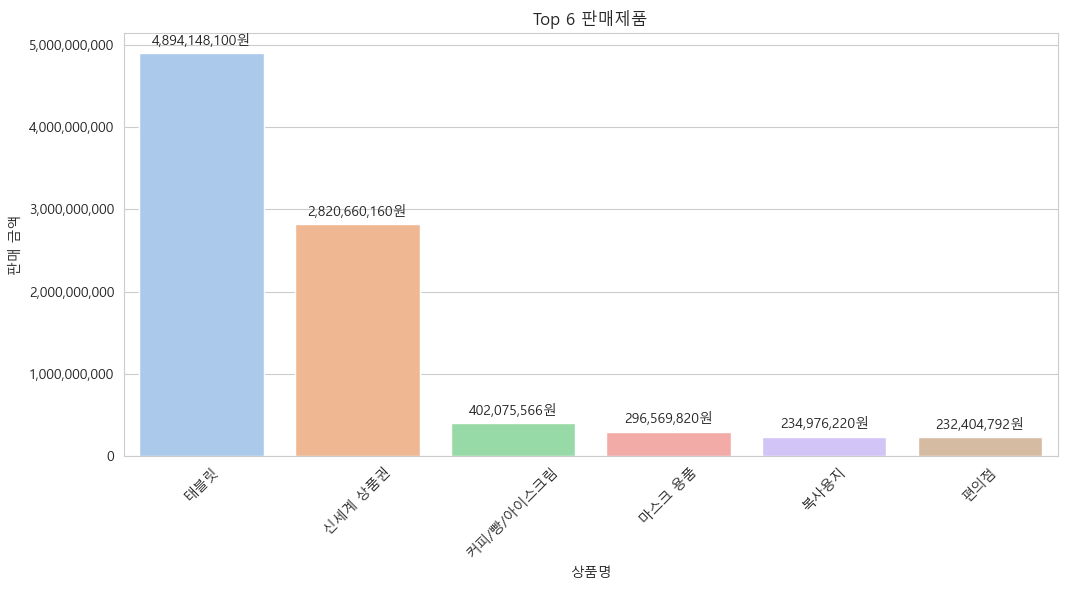

In [19]:
sns.set_style("whitegrid")

#한글 출력
plt.rc('font', family='Malgun Gothic')


# 지수표현 없이 출력하기
pd.options.display.float_format = '{:.5f}'.format

# 그래프
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='상품명', y='판매 금액', data=top_6, palette="pastel")

plt.title('Top 6 판매제품')
plt.xlabel('상품명')
plt.ylabel('판매 금액')
plt.xticks(rotation=45)
plt.tight_layout()

ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(currency_formatter))

# 수치 표현
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}원', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')


# 주문 연도에 따른 해당 상품의 매출 증감 분석


In [20]:
top6_products = ["태블릿", "신세계 상품권", "커피/빵/아이스크림", "마스크 용품", "복사용지", "편의점"]

### 2019년

In [21]:
shop

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,NaN
...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,NaN


In [22]:
# 주문일자 변환
shop['주문일자'] = pd.to_datetime(shop['주문일자'])

In [23]:
# 주문일자 연도 추출하기
shop['주문일자'] = shop['주문일자'].dt.year

# 주문일자 문자열 변환
shop['주문일자'] = shop['주문일자'].astype(str)

In [24]:
shop

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019,구매확정,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019,구매확정,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019,구매확정,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019,구매확정,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019,구매확정,NaN
...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022,결제완료,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022,결제완료,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022,배송준비,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022,배송완료,NaN


In [25]:
df_2019_sales = shop[shop['주문일자'].str.startswith('2019')]
df_2020_sales = shop[shop['주문일자'].str.startswith('2020')]
df_2021_sales = shop[shop['주문일자'].str.startswith('2021')]
df_2022_sales = shop[shop['주문일자'].str.startswith('2022')]

In [26]:
df_2019_sales

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019,구매확정,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019,구매확정,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019,구매확정,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019,구매확정,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019,구매확정,NaN
...,...,...,...,...,...,...,...,...,...,...
594,191231174256255,지니,HBE고학년 노트(파랑)-50개입,HB,1,15000,신용카드,2019,미결제,NaN
595,191231174256255,지니,HBE저학년 노트(노랑)-1세트 50권입,HB,1,15000,신용카드,2019,미결제,NaN
596,191231214255908,지니,HBS 비닐 쇼핑백-1세트 100장입,HB,1,18000,신용카드,2019,구매확정,NaN
597,191231214255908,지니,HBS 지우개-1갑 24개입,HB,2,9600,신용카드,2019,구매확정,NaN


In [27]:
df_2019 = df_2019_sales.groupby('상품명')['판매금액'].sum().sort_values(ascending=False)
print(df_2019)

상품명
eHBM셀파수학교실 종이컵-1박스 1,000개입        528000
HBE대표번호 보조가방                      500000
HBE고학년 노트(파랑)-50개입                480000
HBE메모장(50개)                       420000
[주문제작] HBE 2019겨울방학 전단지-산북교실학원    414000
                                   ...  
[학생선물] 마이스토리 목걸이 수첩                  580
[학생선물] NEW 당근 연필캡                    580
[학생선물] 퍼니 야광 스티커                     580
HBE그래머 노트(노랑)-1세트 50부                  0
[학생선물] 히어로 레이저 요요                      0
Name: 판매금액, Length: 194, dtype: int64


In [28]:
# 데이터 프레임 변환
df_2019_t = df_2019.reset_index()
df_2019_t.columns = ['상품명', '판매금액']

In [29]:
df_2019_t

,상품명,판매금액
0,"eHBM셀파수학교실 종이컵-1박스 1,000개입",528000
1,HBE대표번호 보조가방,500000
2,HBE고학년 노트(파랑)-50개입,480000
3,HBE메모장(50개),420000
4,[주문제작] HBE 2019겨울방학 전단지-산북교실학원,414000
...,...,...
189,[학생선물] 마이스토리 목걸이 수첩,580
190,[학생선물] NEW 당근 연필캡,580
191,[학생선물] 퍼니 야광 스티커,580
192,HBE그래머 노트(노랑)-1세트 50부,0


In [30]:
# 특수문자, 공백 제거
df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'[^\w]', '', regex=True)

# 문자열 변환
df_2019_t['상품명'] = df_2019_t['상품명'].astype(str)

#테스트, Test 들어가는 상품 제거하기
delete = ~df_2019_t['상품명'].str.contains('테스트|test', case=False, regex=True, na=False)
df_2019_t = df_2019_t[delete]

In [31]:
df_2019_t

,상품명,판매금액
0,eHBM셀파수학교실종이컵1박스1000개입,528000
1,HBE대표번호보조가방,500000
2,HBE고학년노트파랑50개입,480000
3,HBE메모장50개,420000
4,주문제작HBE2019겨울방학전단지산북교실학원,414000
...,...,...
189,학생선물마이스토리목걸이수첩,580
190,학생선물NEW당근연필캡,580
191,학생선물퍼니야광스티커,580
192,HBE그래머노트노랑1세트50부,0


In [32]:
df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*태블릿.*', '태블릿', regex=True)
df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*신세계 상품권.*', '신세계 상품권', regex=True)
df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*신세계상품권.*', '신세계 상품권', regex=True)

df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*GS25.*', '편의점', regex=True)
df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*세븐일레븐.*', '편의점', regex=True)
df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*CU.*', '편의점', regex=True)

df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*마스크.*', '마스크 용품', regex=True)

df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*A4.*', '복사용지', regex=True)

df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*배스킨라빈스.*', '커피/빵/아이스크림', regex=True)
df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*투썸.*', '커피/빵/아이스크림', regex=True) # 투썸플레이스라고 안 하고 투썸이라 한 이유는 품목 중 '투썸크렘슈' 가 있습니다.
df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*스타벅스.*', '커피/빵/아이스크림', regex=True)
df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*이디야.*', '커피/빵/아이스크림', regex=True)
df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*할리스.*', '커피/빵/아이스크림', regex=True)
df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*커피빈.*', '커피/빵/아이스크림', regex=True)
df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*엔제리너스.*', '커피/빵/아이스크림', regex=True)
df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*파스쿠찌.*', '커피/빵/아이스크림', regex=True)
df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*폴바셋.*', '커피/빵/아이스크림', regex=True)
df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*파리바게뜨.*', '커피/빵/아이스크림', regex=True)
df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*뚜레쥬르.*', '커피/빵/아이스크림', regex=True)
df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*던킨.*', '커피/빵/아이스크림', regex=True)

C:\Users\user\AppData\Local\Temp\ipykernel_17488\4077952343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*태블릿.*', '태블릿', regex=True)
C:\Users\user\AppData\Local\Temp\ipykernel_17488\4077952343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_t['상품명'] = df_2019_t['상품명'].str.replace(r'.*신세계 상품권.*', '신세계 상품권', regex=True)
C:\Users\user\AppData\Local\Temp\ipykernel_17488\4077952343.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

In [33]:
# 데이터 필터링
tablet = df_2019_t[df_2019_t['상품명'].str.contains('태블릿', case=False)]
giftcard = df_2019_t[df_2019_t['상품명'].str.contains('신세계 상품권', case=False)]
cv_store = df_2019_t[df_2019_t['상품명'].str.contains('편의점', case=False)]
mask = df_2019_t[df_2019_t['상품명'].str.contains('마스크 용품', case=False)]
paper = df_2019_t[df_2019_t['상품명'].str.contains('복사용지', case=False)]
food = df_2019_t[df_2019_t['상품명'].str.contains('커피/빵/아이스크림', case=False)]


# 합계 계산
tablet_sum = tablet['판매금액'].sum()
giftcard_sum = giftcard['판매금액'].sum()
cv_sum = cv_store['판매금액'].sum()
mask_sum = mask['판매금액'].sum()
paper_sum = paper['판매금액'].sum()
food_sum = food['판매금액'].sum()


# 원본 데이터에서 제거한다.
df_2019_t = df_2019_t[~df_2019_t['상품명'].str.contains('태블릿|신세계 상품권|편의점|마스크 용품|복사용지|커피/빵/아이스크림', case=False)]

In [34]:
# 합계 데이터를 원본 데이터에 추가한다.
new = pd.DataFrame({
    '상품명': ['태블릿', '신세계 상품권', '편의점', '마스크 용품', '복사용지', '커피/빵/아이스크림'],
    '판매금액': [tablet_sum, giftcard_sum, cv_sum, mask_sum, paper_sum, food_sum]
})

#데이터 합치기, 2019년에는 신세계 상품권, 편의점, 마스크 용품, 복사용지, 커피/빵/아이스크림은 없다.
new_df_2019 = pd.concat([df_2019_t, new], ignore_index=True)
new_df_2019

,상품명,판매금액
0,eHBM셀파수학교실종이컵1박스1000개입,528000
1,HBE대표번호보조가방,500000
2,HBE고학년노트파랑50개입,480000
3,HBE메모장50개,420000
4,주문제작HBE2019겨울방학전단지산북교실학원,414000
...,...,...
191,신세계 상품권,0
192,편의점,0
193,마스크 용품,0
194,복사용지,150000


In [35]:
filter_2019 = new_df_2019[new_df_2019['상품명'].isin(top6_products)]
filter_2019

,상품명,판매금액
190,태블릿,0
191,신세계 상품권,0
192,편의점,0
193,마스크 용품,0
194,복사용지,150000
195,커피/빵/아이스크림,0


### 2020년

In [36]:
df_2020_sales

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간
599,200101000005858,지니,eHBM셀파수학교실 L파일 홀더-1세트 50개입,HB,2,23000,신용카드,2020,구매확정,NaN
600,200101000005858,지니,eHBM셀파수학교실-연필(빨강)_1세트 50개입,HB,1,6000,신용카드,2020,구매확정,NaN
601,200101000005858,지니,eHBM셀파수학교실-지우개(BOX-24개입),HB,1,5000,신용카드,2020,구매확정,NaN
602,200101084241382,지니,HBS 받아쓰기노트-1세트 50권입,HB,1,12500,신용카드,2020,구매확정,NaN
603,200101084241382,지니,HBS 연필(B)-1세트 50개입,HB,1,6000,신용카드,2020,구매확정,NaN
...,...,...,...,...,...,...,...,...,...,...
37935,201231234508980,다우기술,"[해피콘] 금액권 7,000원",해피콘,3,17700,신용카드,2020,구매확정,NaN
37936,201231234725125,에이스디포,[스마트 HBM*초도] 홍보용 국산 망사수세미 100P,광영산업,5,165000,신 + 웰컴,2020,구매확정,NaN
37937,201231234725125,에이스디포,[스마트 HBM*초도] 대표번호형 휴대용 손세정티슈 10매-1set 100개입,NaN,3,89700,신 + 웰컴,2020,구매확정,NaN
37938,201231234725125,지니,[스마트 HBM*초도] 종이컵 (1박스-1000개입),HB,1,16000,신 + 웰컴,2020,구매확정,NaN


In [37]:
df_2020 = df_2020_sales.groupby('상품명')['판매금액'].sum().sort_values(ascending=False)
print(df_2020)

상품명
[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제)                    375168000
[스마트 HBM] 학습 전용 태블릿(정기결제)                         100980000
[스마트 HBE] 학습 전용 태블릿(신규 가맹점용)                       97152000
[스마트 HBE] 학습 전용 태블릿(정기결제)                          84744000
[마감] 3D 패션 마스크 벌크-50개입                             63185000
                                                    ...    
공동구매 테스트2                                               100
딜상품 테스트중                                                100
[학습교구] 1인용 자석 숫자                                          0
[생활용품] 스위스 몽크로스  Smart Multi 티메이커 EGK-MST22000            0
[동원] 명절 식품 선물세트 + 동원 판호                                   0
Name: 판매금액, Length: 3955, dtype: int64


In [38]:
# 데이터 프레임 변환
df_2020_t = df_2020.reset_index()
df_2020_t.columns = ['상품명', '판매금액']

In [39]:
# 특수문자, 공백 제거
df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'[^\w]', '', regex=True)

# 문자열 변환
df_2020_t['상품명'] = df_2020_t['상품명'].astype(str)

#테스트, Test 들어가는 상품 제거하기
delete = ~df_2020_t['상품명'].str.contains('테스트|test', case=False, regex=True, na=False)
df_2020_t = df_2020_t[delete]

In [40]:
df_2020_t

,상품명,판매금액
0,스마트HBM학습전용태블릿더큰도전후불결제,375168000
1,스마트HBM학습전용태블릿정기결제,100980000
2,스마트HBE학습전용태블릿신규가맹점용,97152000
3,스마트HBE학습전용태블릿정기결제,84744000
4,마감3D패션마스크벌크50개입,63185000
...,...,...
3945,사무용품화신500크립,270
3946,사무용품화신캇타날소,240
3952,학습교구1인용자석숫자,0
3953,생활용품스위스몽크로스SmartMulti티메이커EGKMST22000,0


In [41]:
df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*태블릿.*', '태블릿', regex=True)
df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*신세계 상품권.*', '신세계 상품권', regex=True)
df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*신세계상품권.*', '신세계 상품권', regex=True)

df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*GS25.*', '편의점', regex=True)
df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*세븐일레븐.*', '편의점', regex=True)
df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*CU.*', '편의점', regex=True)

df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*마스크.*', '마스크 용품', regex=True)

df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*A4.*', '복사용지', regex=True)

df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*배스킨라빈스.*', '커피/빵/아이스크림', regex=True)
df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*투썸.*', '커피/빵/아이스크림', regex=True) # 투썸플레이스라고 안 하고 투썸이라 한 이유는 품목 중 '투썸크렘슈' 가 있습니다.
df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*스타벅스.*', '커피/빵/아이스크림', regex=True)
df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*이디야.*', '커피/빵/아이스크림', regex=True)
df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*할리스.*', '커피/빵/아이스크림', regex=True)
df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*커피빈.*', '커피/빵/아이스크림', regex=True)
df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*엔제리너스.*', '커피/빵/아이스크림', regex=True)
df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*파스쿠찌.*', '커피/빵/아이스크림', regex=True)
df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*폴바셋.*', '커피/빵/아이스크림', regex=True)
df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*파리바게뜨.*', '커피/빵/아이스크림', regex=True)
df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*뚜레쥬르.*', '커피/빵/아이스크림', regex=True)
df_2020_t['상품명'] = df_2020_t['상품명'].str.replace(r'.*던킨.*', '커피/빵/아이스크림', regex=True)

In [42]:
# 데이터 필터링
tablet = df_2020_t[df_2020_t['상품명'].str.contains('태블릿', case=False)]
giftcard = df_2020_t[df_2020_t['상품명'].str.contains('신세계 상품권', case=False)]
cv_store = df_2020_t[df_2020_t['상품명'].str.contains('편의점', case=False)]
mask = df_2020_t[df_2020_t['상품명'].str.contains('마스크 용품', case=False)]
paper = df_2020_t[df_2020_t['상품명'].str.contains('복사용지', case=False)]
food = df_2020_t[df_2020_t['상품명'].str.contains('커피/빵/아이스크림', case=False)]


# 합계 계산
tablet_sum = tablet['판매금액'].sum()
giftcard_sum = giftcard['판매금액'].sum()
cv_sum = cv_store['판매금액'].sum()
mask_sum = mask['판매금액'].sum()
paper_sum = paper['판매금액'].sum()
food_sum = food['판매금액'].sum()


# 원본 데이터에서 제거한다.
df_2020_t = df_2020_t[~df_2020_t['상품명'].str.contains('태블릿|신세계 상품권|편의점|마스크 용품|복사용지|커피/빵/아이스크림', case=False)]

In [43]:
# 합계 데이터를 원본 데이터에 추가한다.
new = pd.DataFrame({
    '상품명': ['태블릿', '신세계 상품권', '편의점', '마스크 용품', '복사용지', '커피/빵/아이스크림'],
    '판매금액': [tablet_sum, giftcard_sum, cv_sum, mask_sum, paper_sum, food_sum]
})

#데이터 합치기, 2020년에는
new_df_2020 = pd.concat([df_2020_t, new], ignore_index=True)
new_df_2020

,상품명,판매금액
0,스마트HBM겨울방학판촉물핫팩1Box120개입,19150000
1,스마트HBE겨울방학판촉물핫팩1Box120개입,18630000
2,셀파우등생교실겨울방학판촉물핫팩1Box120개입,14280000
3,보리건빵1box160개입,11700000
4,HBE메모장50개,11330000
...,...,...
3628,신세계 상품권,5954200
3629,편의점,4940900
3630,마스크 용품,173957520
3631,복사용지,53284470


In [44]:
filter_2020 = new_df_2020[new_df_2020['상품명'].isin(top6_products)]
filter_2020

,상품명,판매금액
3627,태블릿,670057500
3628,신세계 상품권,5954200
3629,편의점,4940900
3630,마스크 용품,173957520
3631,복사용지,53284470
3632,커피/빵/아이스크림,19894990


### 2021년

In [45]:
df_2021_sales

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간
37940,210101000056132,지니,[스마트 HBM*초도] 지우개 (1박스-24개입),NaN,1,5000,신 + 웰컴,2021,구매확정,NaN
37941,210101000056132,지니,[스마트 HBM*초도] 종이컵 (1박스-1000개입),HB,1,16000,신 + 웰컴,2021,구매확정,NaN
37942,210101000056132,지니,[스마트 HBM*초도교재] 수학은셀파개념 3학년-1권,HB,1,3500,신 + 웰컴,2021,구매확정,NaN
37943,210101000056132,지니,[스마트 HBM*초도교재] 수학은셀파개념 3학년-2권,HB,1,3500,신 + 웰컴,2021,구매확정,NaN
37944,210101000056132,지니,[스마트 HBM*초도교재] 수학은셀파개념 3학년-3권,HB,1,3500,신 + 웰컴,2021,구매확정,NaN
...,...,...,...,...,...,...,...,...,...,...
109754,211231231518684,지니,[해법 어워즈 특가] 스마트 HBE-저학년용 영어노트(1세트 10개입),HB,5,10000,신 + 적,2021,구매확정,NaN
109755,211231231518684,지니,[해법 어워즈 특가] 스마트 HBE-고학년용 영어노트(1세트 10개입),HB,5,10000,신 + 적,2021,구매확정,NaN
109756,211231231518684,지니,[해법 어워즈 특가] 스마트 HBE-유선 메모장(1세트 50개입),NaN,2,31000,신 + 적,2021,구매확정,NaN
109757,211231231518684,지니,[5월 해법특가] 스마트 HBE-인덱스 홀더 (1팩 50개입),NaN,2,21800,신 + 적,2021,구매확정,NaN


In [46]:
df_2021 = df_2021_sales.groupby('상품명')['판매금액'].sum().sort_values(ascending=False)
print(df_2021)

상품명
[명절상품권특가] 신세계 상품권 교환권-4만원권             424943400
[스마트 HBE] 학습 전용 태블릿(정기결제)              381744000
[스마트 HBE] 학습 전용 태블릿-정기결제               292248000
[신세계] 신세계 상품권-4만원권                     254630400
[스마트 HBM] 학습 전용 태블릿(정기결제)              211068000
                                         ...    
[해법 어워즈 특가] 해법중국어-니하오 한쯔 8급 한자 포스터           150
주문제작 테스트상품                                   100
[스마트 HBM] 회원모집-채우자 족자 현수막_황율리아나님 전용            0
[3M] 파인룩스 스탠드/LED 7200 (색상선택)                  0
[동아] 0.5 에너겔 501-낱개 (색상선택)                     0
Name: 판매금액, Length: 6877, dtype: int64


In [47]:
# 데이터 프레임 변환
df_2021_t = df_2021.reset_index()
df_2021_t.columns = ['상품명', '판매금액']

In [48]:
# 특수문자, 공백 제거
df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'[^\w]', '', regex=True)

# 문자열 변환
df_2021_t['상품명'] = df_2021_t['상품명'].astype(str)

#테스트, Test 들어가는 상품 제거하기
delete = ~df_2021_t['상품명'].str.contains('테스트|test', case=False, regex=True, na=False)
df_2021_t = df_2021_t[delete]

In [49]:
df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*태블릿.*', '태블릿', regex=True)
df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*신세계 상품권.*', '신세계 상품권', regex=True)
df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*신세계상품권.*', '신세계 상품권', regex=True)

df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*GS25.*', '편의점', regex=True)
df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*세븐일레븐.*', '편의점', regex=True)
df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*CU.*', '편의점', regex=True)

df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*마스크.*', '마스크 용품', regex=True)

df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*A4.*', '복사용지', regex=True)

df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*배스킨라빈스.*', '커피/빵/아이스크림', regex=True)
df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*투썸.*', '커피/빵/아이스크림', regex=True) # 투썸플레이스라고 안 하고 투썸이라 한 이유는 품목 중 '투썸크렘슈' 가 있습니다.
df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*스타벅스.*', '커피/빵/아이스크림', regex=True)
df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*이디야.*', '커피/빵/아이스크림', regex=True)
df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*할리스.*', '커피/빵/아이스크림', regex=True)
df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*커피빈.*', '커피/빵/아이스크림', regex=True)
df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*엔제리너스.*', '커피/빵/아이스크림', regex=True)
df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*파스쿠찌.*', '커피/빵/아이스크림', regex=True)
df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*폴바셋.*', '커피/빵/아이스크림', regex=True)
df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*파리바게뜨.*', '커피/빵/아이스크림', regex=True)
df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*뚜레쥬르.*', '커피/빵/아이스크림', regex=True)
df_2021_t['상품명'] = df_2021_t['상품명'].str.replace(r'.*던킨.*', '커피/빵/아이스크림', regex=True)

In [50]:
# 데이터 필터링
tablet = df_2021_t[df_2021_t['상품명'].str.contains('태블릿', case=False)]
giftcard = df_2021_t[df_2021_t['상품명'].str.contains('신세계 상품권', case=False)]
cv_store = df_2021_t[df_2021_t['상품명'].str.contains('편의점', case=False)]
mask = df_2021_t[df_2021_t['상품명'].str.contains('마스크 용품', case=False)]
paper = df_2021_t[df_2021_t['상품명'].str.contains('복사용지', case=False)]
food = df_2021_t[df_2021_t['상품명'].str.contains('커피/빵/아이스크림', case=False)]


# 합계 계산
tablet_sum = tablet['판매금액'].sum()
giftcard_sum = giftcard['판매금액'].sum()
cv_sum = cv_store['판매금액'].sum()
mask_sum = mask['판매금액'].sum()
paper_sum = paper['판매금액'].sum()
food_sum = food['판매금액'].sum()


# 원본 데이터에서 제거한다.
df_2021_t = df_2021_t[~df_2021_t['상품명'].str.contains('태블릿|신세계 상품권|편의점|마스크 용품|복사용지|커피/빵/아이스크림', case=False)]

In [51]:
# 합계 데이터를 원본 데이터에 추가한다.
new = pd.DataFrame({
    '상품명': ['태블릿', '신세계 상품권', '편의점', '마스크 용품', '복사용지', '커피/빵/아이스크림'],
    '판매금액': [tablet_sum, giftcard_sum, cv_sum, mask_sum, paper_sum, food_sum]
})

#데이터 합치기, 2021년에는
new_df_2021 = pd.concat([df_2021_t, new], ignore_index=True)
new_df_2021

,상품명,판매금액
0,겨울방학판촉물스마트HBM겨울방학판촉물흔들이손난로1Box120개입,26874400
1,겨울방학판촉물스마트HBE겨울방학판촉물흔들이손난로1Box120개입,17787800
2,신학기한정판매스마트해법방역키트세트1Box20Set,11376000
3,가정의달공동구매스마트해법파스텔에코젠보틀1Set15개입무료배송색상랜덤,10554700
4,여름판촉물특가스마트HBM데일리밴드1set100개입,9960300
...,...,...
5635,신세계 상품권,1108354060
5636,편의점,57502572
5637,마스크 용품,110170850
5638,복사용지,99541390


In [52]:
filter_2021 = new_df_2021[new_df_2021['상품명'].isin(top6_products)]
filter_2021

,상품명,판매금액
5634,태블릿,1450910800
5635,신세계 상품권,1108354060
5636,편의점,57502572
5637,마스크 용품,110170850
5638,복사용지,99541390
5639,커피/빵/아이스크림,126107366


### 2022년

In [53]:
df_2022_sales

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간
109759,220101001933734,다우기술,[스타벅스] 부드러운 디저트 세트(카페 아메리카노Tall 2잔+부드러운 생크림 카스텔라),스타벅스,1,10700,신용카드,2022,구매확정,NaN
109760,220101005521286,지니,[런칭특가*초도] 스마트 HBM-HB 황사방역 마스크 KF-94(검정)-대형 1갑 ...,마스크공작소,2,25800,웰컴마일,2022,구매확정,NaN
109761,220101005521286,지니,[스마트 HBM*초도] 종이컵 (1박스-1000개입),HB,1,16000,웰컴마일,2022,구매확정,NaN
109762,220101005521286,지니,[HB*초도] 황사방역 마스크 KF-94(흰색)-대형 1갑 50개입,마스크공작소,2,33800,웰컴마일,2022,구매확정,NaN
109763,220101005621508,이트너스,[주간특가] 삼성전자 흑백 레이저 프린터 20ppm SL-M2035,삼성전자,1,87900,신 + 포,2022,미결제,NaN
...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022,결제완료,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022,결제완료,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022,배송준비,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022,배송완료,NaN


In [54]:
df_2022 = df_2022_sales.groupby('상품명')['판매금액'].sum().sort_values(ascending=False)
print(df_2022)

상품명
[스마트 HBE] 학습 전용 태블릿-일반결제             771804000
[신세계] 신세계 상품권-4만원권                   639897600
[지사전용] 스마트 HBE-학습 전용 태블릿-후불          622908000
[지사전용] 스마트 HBM-학습 전용 태블릿-후불          458964000
[스마트 HBM] 학습 전용 태블릿-일반결제             293040000
                                       ...    
[신학기특가] 셀파우등생-이미지 포스터(드림)-1세트 2장입          300
[학생선물] 500 컬러봉투 1170 (색상선택)                250
[퍼페티] 츄파춥스 250                             200
[필기류] 자바 PASS 컴퓨터용 싸인펜 / 낱개                190
[보건용품] 살균제 MD-125 4L                         0
Name: 판매금액, Length: 6710, dtype: int64


In [55]:
# 데이터 프레임 변환
df_2022_t = df_2022.reset_index()
df_2022_t.columns = ['상품명', '판매금액']

In [56]:
# 특수문자, 공백 제거
df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'[^\w]', '', regex=True)

# 문자열 변환
df_2022_t['상품명'] = df_2022_t['상품명'].astype(str)

#테스트, Test 들어가는 상품 제거하기
delete = ~df_2022_t['상품명'].str.contains('테스트|test', case=False, regex=True, na=False)
df_2022_t = df_2022_t[delete]

In [57]:
df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*태블릿.*', '태블릿', regex=True)
df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*신세계 상품권.*', '신세계 상품권', regex=True)
df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*신세계상품권.*', '신세계 상품권', regex=True)

df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*GS25.*', '편의점', regex=True)
df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*세븐일레븐.*', '편의점', regex=True)
df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*CU.*', '편의점', regex=True)

df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*마스크.*', '마스크 용품', regex=True)

df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*A4.*', '복사용지', regex=True)

df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*배스킨라빈스.*', '커피/빵/아이스크림', regex=True)
df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*투썸.*', '커피/빵/아이스크림', regex=True) # 투썸플레이스라고 안 하고 투썸이라 한 이유는 품목 중 '투썸크렘슈' 가 있습니다.
df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*스타벅스.*', '커피/빵/아이스크림', regex=True)
df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*이디야.*', '커피/빵/아이스크림', regex=True)
df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*할리스.*', '커피/빵/아이스크림', regex=True)
df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*커피빈.*', '커피/빵/아이스크림', regex=True)
df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*엔제리너스.*', '커피/빵/아이스크림', regex=True)
df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*파스쿠찌.*', '커피/빵/아이스크림', regex=True)
df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*폴바셋.*', '커피/빵/아이스크림', regex=True)
df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*파리바게뜨.*', '커피/빵/아이스크림', regex=True)
df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*뚜레쥬르.*', '커피/빵/아이스크림', regex=True)
df_2022_t['상품명'] = df_2022_t['상품명'].str.replace(r'.*던킨.*', '커피/빵/아이스크림', regex=True)

In [58]:
# 데이터 필터링
tablet = df_2022_t[df_2022_t['상품명'].str.contains('태블릿', case=False)]
giftcard = df_2022_t[df_2022_t['상품명'].str.contains('신세계 상품권', case=False)]
cv_store = df_2022_t[df_2022_t['상품명'].str.contains('편의점', case=False)]
mask = df_2022_t[df_2022_t['상품명'].str.contains('마스크 용품', case=False)]
paper = df_2022_t[df_2022_t['상품명'].str.contains('복사용지', case=False)]
food = df_2022_t[df_2022_t['상품명'].str.contains('커피/빵/아이스크림', case=False)]


# 합계 계산
tablet_sum = tablet['판매금액'].sum()
giftcard_sum = giftcard['판매금액'].sum()
cv_sum = cv_store['판매금액'].sum()
mask_sum = mask['판매금액'].sum()
paper_sum = paper['판매금액'].sum()
food_sum = food['판매금액'].sum()


# 원본 데이터에서 제거한다.
df_2022_t = df_2022_t[~df_2022_t['상품명'].str.contains('태블릿|신세계 상품권|편의점|마스크 용품|복사용지|커피/빵/아이스크림', case=False)]

In [59]:
# 합계 데이터를 원본 데이터에 추가한다.
new = pd.DataFrame({
    '상품명': ['태블릿', '신세계 상품권', '편의점', '마스크 용품', '복사용지', '커피/빵/아이스크림'],
    '판매금액': [tablet_sum, giftcard_sum, cv_sum, mask_sum, paper_sum, food_sum]
})

#데이터 합치기, 2021년에는
new_df_2022 = pd.concat([df_2022_t, new], ignore_index=True)
new_df_2022

,상품명,판매금액
0,스마트HBM지사용방문영업패키지,30500000
1,스마트HBE지사용방문영업패키지,24500000
2,아웃백디지털상품권5만원권,19844400
3,한정판매스마트HBM흔들이핫팩1Box80개입,14411800
4,한정특가스마트HBM다용도필통1set10개입,14398000
...,...,...
5346,신세계 상품권,1706351900
5347,편의점,169961320
5348,마스크 용품,12441450
5349,복사용지,82000360


In [60]:
filter_2022 = new_df_2022[new_df_2022['상품명'].isin(top6_products)]
filter_2022

,상품명,판매금액
5345,태블릿,2773179800
5346,신세계 상품권,1706351900
5347,편의점,169961320
5348,마스크 용품,12441450
5349,복사용지,82000360
5350,커피/빵/아이스크림,256073210


# 합치기

In [61]:
filter_2019.rename(columns={'판매금액': '2019년 판매금액'}, inplace=True)
filter_2019

C:\Users\user\AppData\Local\Temp\ipykernel_17488\773970688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_2019.rename(columns={'판매금액': '2019년 판매금액'}, inplace=True)


,상품명,2019년 판매금액
190,태블릿,0
191,신세계 상품권,0
192,편의점,0
193,마스크 용품,0
194,복사용지,150000
195,커피/빵/아이스크림,0


In [62]:
filter_2020.rename(columns={'판매금액': '2020년 판매금액'}, inplace=True)
filter_2020

C:\Users\user\AppData\Local\Temp\ipykernel_17488\3695717108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_2020.rename(columns={'판매금액': '2020년 판매금액'}, inplace=True)


,상품명,2020년 판매금액
3627,태블릿,670057500
3628,신세계 상품권,5954200
3629,편의점,4940900
3630,마스크 용품,173957520
3631,복사용지,53284470
3632,커피/빵/아이스크림,19894990


In [63]:
filter_2021.rename(columns={'판매금액': '2021년 판매금액'}, inplace=True)
filter_2021

C:\Users\user\AppData\Local\Temp\ipykernel_17488\2340145028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_2021.rename(columns={'판매금액': '2021년 판매금액'}, inplace=True)


,상품명,2021년 판매금액
5634,태블릿,1450910800
5635,신세계 상품권,1108354060
5636,편의점,57502572
5637,마스크 용품,110170850
5638,복사용지,99541390
5639,커피/빵/아이스크림,126107366


In [64]:
filter_2022.rename(columns={'판매금액': '2022년 판매금액'}, inplace=True)
filter_2022

C:\Users\user\AppData\Local\Temp\ipykernel_17488\1816486082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_2022.rename(columns={'판매금액': '2022년 판매금액'}, inplace=True)


,상품명,2022년 판매금액
5345,태블릿,2773179800
5346,신세계 상품권,1706351900
5347,편의점,169961320
5348,마스크 용품,12441450
5349,복사용지,82000360
5350,커피/빵/아이스크림,256073210


In [65]:
merge_year = filter_2019.merge(filter_2020, on="상품명").merge(filter_2021, on="상품명").merge(filter_2022, on="상품명")

In [66]:
merge_year

,상품명,2019년 판매금액,2020년 판매금액,2021년 판매금액,2022년 판매금액
0,태블릿,0,670057500,1450910800,2773179800
1,신세계 상품권,0,5954200,1108354060,1706351900
2,편의점,0,4940900,57502572,169961320
3,마스크 용품,0,173957520,110170850,12441450
4,복사용지,150000,53284470,99541390,82000360
5,커피/빵/아이스크림,0,19894990,126107366,256073210


In [67]:
# 각 연도별 판매금액의 증감 계산
merge_year["증감_2019_2020"] = merge_year["2020년 판매금액"] - merge_year["2019년 판매금액"]
merge_year["증감_2020_2021"] = merge_year["2021년 판매금액"] - merge_year["2020년 판매금액"]
merge_year["증감_2021_2022"] = merge_year["2022년 판매금액"] - merge_year["2021년 판매금액"]

merge_year[["상품명", "증감_2019_2020", "증감_2020_2021", "증감_2021_2022"]]

,상품명,증감_2019_2020,증감_2020_2021,증감_2021_2022
0,태블릿,670057500,780853300,1322269000
1,신세계 상품권,5954200,1102399860,597997840
2,편의점,4940900,52561672,112458748
3,마스크 용품,173957520,-63786670,-97729400
4,복사용지,53134470,46256920,-17541030
5,커피/빵/아이스크림,19894990,106212376,129965844


# 그래프

C:\Users\user\AppData\Local\Temp\ipykernel_17488\2434699661.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='상품명', y='판매 금액', data=top_6, palette="pastel")


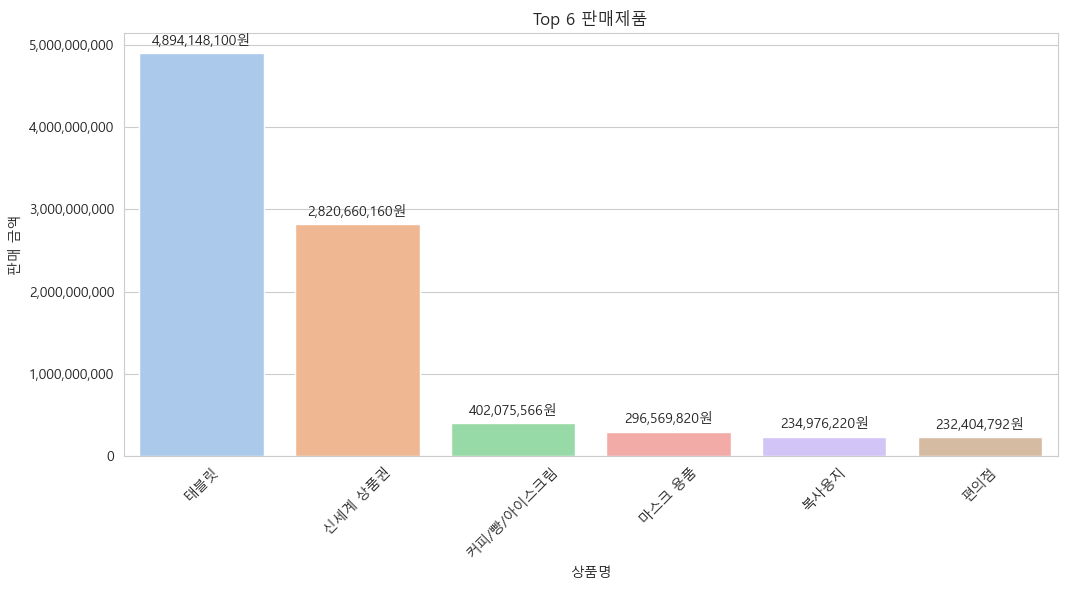

In [68]:
sns.set_style("whitegrid")

#한글 출력
plt.rc('font', family='Malgun Gothic')


# 지수표현 없이 출력하기
pd.options.display.float_format = '{:.5f}'.format

# 그래프
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='상품명', y='판매 금액', data=top_6, palette="pastel")

plt.title('Top 6 판매제품')
plt.xlabel('상품명')
plt.ylabel('판매 금액')
plt.xticks(rotation=45)
plt.tight_layout()

ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(currency_formatter))

# 수치 표현
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}원', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')


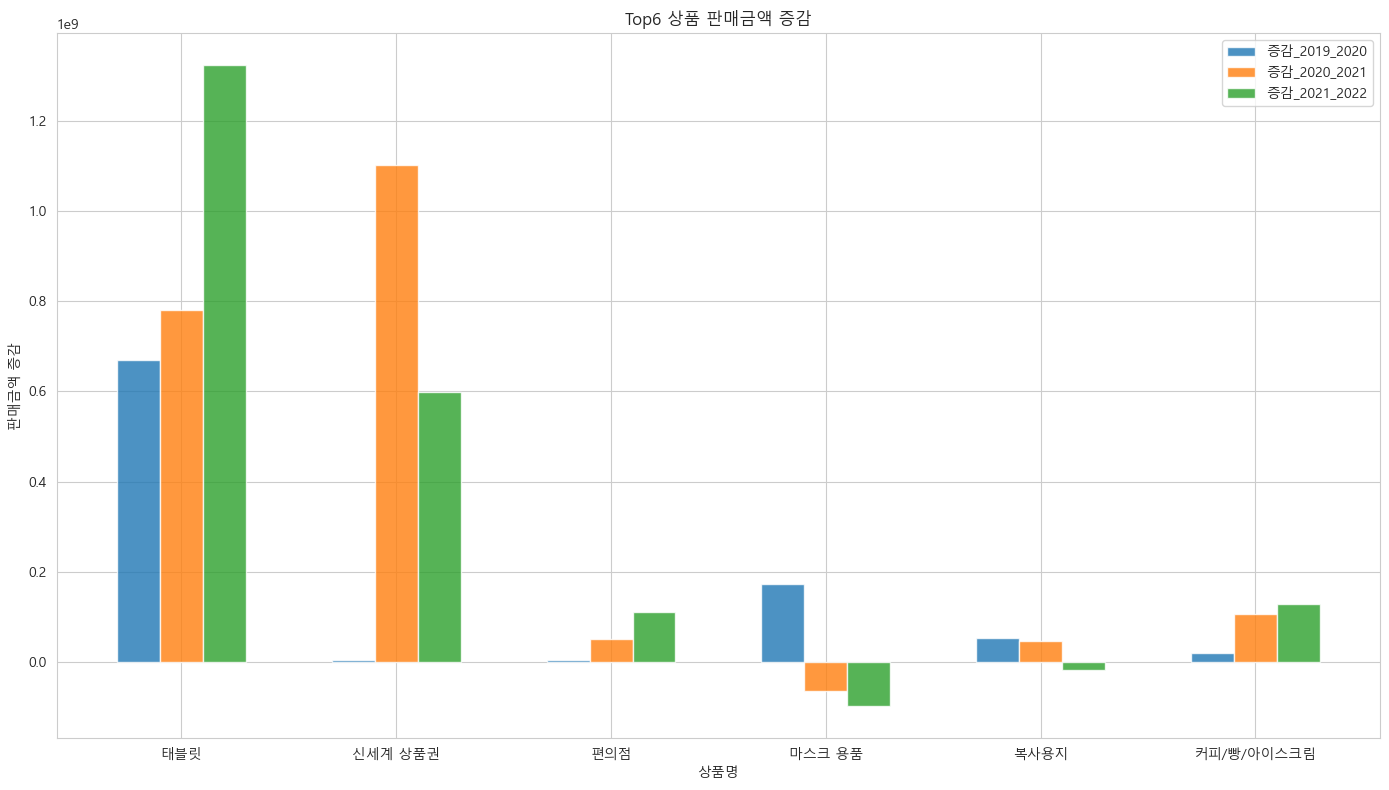

In [69]:
plt.figure(figsize=(14, 8))

pd.options.display.float_format = '{:.5f}'.format

# 막대그래프
bar_width = 0.2
index = range(len(merge_year))

plt.bar(index, merge_year["증감_2019_2020"], bar_width, label="증감_2019_2020", alpha=0.8)
plt.bar([i+bar_width for i in index], merge_year["증감_2020_2021"], bar_width, label="증감_2020_2021", alpha=0.8)
plt.bar([i+bar_width*2 for i in index], merge_year["증감_2021_2022"], bar_width, label="증감_2021_2022", alpha=0.8)

plt.xlabel("상품명")
plt.xticks([i+bar_width for i in index], merge_year["상품명"])
plt.ylabel("판매금액 증감")
plt.title("Top6 상품 판매금액 증감")

# 범례
plt.legend()

# 그래프
plt.tight_layout()
plt.show()


* 모든 상품은 2019년도에 판매금액이 0원이었다.

* 태블릿은 큰 폭으로 우상향하고 신세계 상품권은 크게 팔렸다가 감소하는 폭을 보이고 있으며 편의점 상품과 커피/빵/아이스크림은 우상향하고 있으며 마스크 용품의 경우에는 2019년, 2020년 코로나가 터지고 1년동안 높은 판매량을 보였다가 크게 감소하는
양상을 보이고 있습니다.